In [71]:
#source http://developer.nytimes.com/books_api.json

#current issues:
    #'/list.json' has the main data i want, but i get an error when i retrieve it
    #'/lists/best-sellers/history.json' has data i would also want, however, it caps at 20 rows

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

# basically takes a URL part (with a slash at the front!) and returns a
# three-tuple of stuff you can load into panda data frame

import requests
import json

def getNYTresults(urlPart):
    nyt = "https://api.nytimes.com/svc/books/v3"
    k = "46918f501709456294d8555cf1cae256" # apikey
    headersD = {'api-key':'eab60184bb3d4ed4949e6e899d2e428b'}
    response = requests.get(nyt+urlPart,headers=headersD)
    if response.status_code != 200:
        return str(response.status_code)
    else:
        return response.text

def parseJSON(j):
    if type(j) == "str":
        return {}
    d = json.loads(j)
    return d

def main(urlPart):
    jD = parseJSON(getNYTresults(urlPart))
    resDL = jD["results"]
    indexL = [i+1 for i in range(len(resDL))]
    colL = resDL[0].keys()
    rowL = [book.values() for book in resDL]
    return (rowL, indexL, colL)

nyt_hist = main("/lists/best-sellers/history.json")
nyt_names = main('/lists/names.json')

In [72]:
nyt_names = pd.DataFrame(nyt_names[0],index=nyt_names[1],columns=nyt_names[2])
nyt_hist = pd.DataFrame(nyt_hist[0],index=nyt_hist[1],columns=nyt_hist[2])

In [73]:
nyt_hist.head()

,title,description,contributor,author,contributor_note,price,age_group,publisher,isbns,ranks_history,reviews
1,"""I GIVE YOU MY BODY ...""",The author of the Outlander novels gives tips ...,by Diana Gabaldon,Diana Gabaldon,,0.0,,Dell,"[{'isbn10': '0399178570', 'isbn13': '978039917...","[{'primary_isbn10': '0399178570', 'primary_isb...","[{'book_review_link': '', 'first_chapter_link'..."
2,"""MOST BLESSED OF THE PATRIARCHS""",A character study that attempts to make sense ...,by Annette Gordon-Reed and Peter S. Onuf,Annette Gordon-Reed and Peter S Onuf,,0.0,,Liveright,"[{'isbn10': '0871404427', 'isbn13': '978087140...","[{'primary_isbn10': '0871404427', 'primary_isb...","[{'book_review_link': '', 'first_chapter_link'..."
3,#ASKGARYVEE,The entrepreneur expands on subjects addressed...,by Gary Vaynerchuk,Gary Vaynerchuk,,0.0,,HarperCollins,"[{'isbn10': '0062273124', 'isbn13': '978006227...","[{'primary_isbn10': '0062273124', 'primary_isb...","[{'book_review_link': '', 'first_chapter_link'..."
4,#GIRLBOSS,An online fashion retailer traces her path to ...,by Sophia Amoruso,Sophia Amoruso,,0.0,,Portfolio/Penguin/Putnam,"[{'isbn10': '039916927X', 'isbn13': '978039916...","[{'primary_isbn10': '1591847931', 'primary_isb...","[{'book_review_link': '', 'first_chapter_link'..."
5,#NEVERAGAIN,Students from Marjory Stoneman Douglas High Sc...,by David Hogg and Lauren Hogg,David Hogg and Lauren Hogg,,0.0,,Random House,"[{'isbn10': '198480183X', 'isbn13': '978198480...","[{'primary_isbn10': '198480183X', 'primary_isb...","[{'book_review_link': '', 'first_chapter_link'..."


In [74]:
nyt_hist.describe()

,price
count,20.000000
mean,1.699500
std,5.581992
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,23.000000


In [75]:
nyt_hist.isnull().sum()

title               0
description         6
contributor         6
author              0
contributor_note    6
price               0
age_group           6
publisher           6
isbns               0
ranks_history       0
reviews             0
dtype: int64

In [76]:
nyt_hist.dtypes

title                object
description          object
contributor          object
author               object
contributor_note     object
price               float64
age_group            object
publisher            object
isbns                object
ranks_history        object
reviews              object
dtype: object

In [79]:
nyt_hist.publisher.value_counts() 


Workman                     2
Harlequin Mira              2
Liveright                   1
Crown Business              1
Random House                1
Portfolio/Penguin/Putnam    1
TOKYOPOP                    1
Abrams                      1
Dell                        1
HarperCollins               1
Grand Central               1
Berkley                     1
Name: publisher, dtype: int64

In [80]:
nyt_hist.shape

(20, 11)

KeyError: 'publisher'

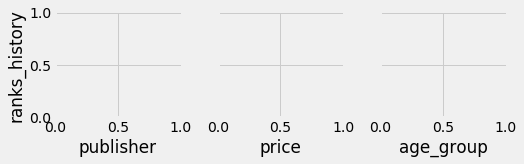

In [81]:
feature_cols = ['publisher', 'price', 'age_group']
sns.pairplot(goodbooks, x_vars=feature_cols, y_vars='ranks_history');